<a href="https://colab.research.google.com/github/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/SOLUTION_Encoders_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 - Encoders Exercise - Solution

> [Click here](#new) to jump to new assignment's solution.

<table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">Encoders Exercise (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>
<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>
<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>
<hr>
<h1>Encoders Exercise (Practice)</h1>
<h2>Instructions</h2>
<p>For this task, you will continue working with the <a href="https://drive.google.com/file/d/1-17RJeMvb7Ruak-NBLnLleQYL_4tOQn_/view?usp=share_link">modified version of the cereals dataset.</a> You can find the <a href="https://www.kaggle.com/datasets/crawford/80-cereals">data dictionary on Kaggle.</a></p>
<p>This dataset shows popular cereals by brand and manufacturer, along with nutrition facts. The machine learning question is:</p>
<p><em>How well can the "rating" of cereal be predicted using the following features?</em></p>
<ul>
<li>mfr, type, calories, protein, fat, fiber, sugars, shelf</li>
</ul>
<p>In the Feature Inspection practice assignment, you performed EDA and took notes on your observations for every feature in the dataset.</p>
<p>In the SimpleImputer Exercise Practice assignment, you created your training and test data splits, separated features by data type, and imputed missing values for each type of feature.</p>
<p>For this assignment, you will continue pre-processing the data by encoding the categorical and ordinal features.</p>
<h2>Task</h2>
<p><strong><u>Continue working in your previous notebook from the SimpleImputer Exercise.</u></strong></p>
<ul>
<li>Note: if you did not complete the previous practice assignment, return to the previous assignment page and make a copy of the assignment solution notebook at the bottom to use as your starter notebook.</li>
</ul>
<ul>
<li>Add a new H1 header for this assignment at the bottom of your current notebook (e.g., # Encoders Exercise ).</li>
</ul>
<p><strong><u>Import the new requirements/tools</u></strong></p>
<ul>
<li>Import the<code>OrdinalEncoder</code> and <code>OneHotEncoder</code> classes from sklearn.preprocessing</li>
</ul>
<p><strong><u>Encode the categorical features with OneHotEncoder</u></strong></p>
<ul>
<li>Instantiate a <code>OneHotEncoder</code> with sparse_output=False and handle_unknown='ignore'</li>
</ul>
<ul>
<li>Fit the encoder X_train_cat_imputed
</li>
<li>Transform the categorical training data (X_train_cat_imputed) and save the output as "X_train_cat_encoded"
</li>
<li>Transform the categorical test data (X_test_cat_imputed) and save the transformed data as "X_test_cat_encoded"
</li>
<li>Preview the first 5 rows of X_train_cat_encoded.
</li>
<li>Check the shape of the <code>X_train_cat_encoded</code> vs. <code>X_train_cat_imputed</code>. 
<ul>
<li>Answer the question(s) in a Markdown cell: 
<ul>
<li>Did the shape change? If so, what changed?</li>
</ul>
</li>
</ul>
</li>
</ul>
<p><strong><u>Encode the ordinal features with OrdinalEncoder</u></strong></p>
<ul>
<li>Examine the unique values in the ordinal feature (shelf) in X_train_ord_imputed.</li>
<li>Create a list called <code>shelf_order</code> that has the unique shelf category names in the desired order (from bottom to top). </li>
<li>Instantiate an <code>OrdinalEncoder</code> using the categories set to  <code>[shelf_prder]</code></li>
</ul>
<ul>
<li>Fit the encoder X_train_ord_imputed
</li>
<li>Transform the ordinal training data (X_train_ord_imputed) and save the output as "X_train_ord_encoded"
</li>
<li>Transform the ordinal test data (X_test_ord_imputed) and save the transformed data as "X_test_ord_encoded"
</li>
<li>Preview the first 5 rows of X_train_ord_encoded.
</li>
<li>Check the shape of the <code>X_train_ord_encoded</code> vs. <code>X_train_ord_imputed</code>. 
<ul>
<li>Answer the question(s) in a Markdown cell: 
<ul>
<li>Did the shape change? If so, what changed?</li>
</ul>
</li>
</ul>
</li>
</ul>
<p>Then save your notebook and use File &gt; Download &gt; Download Notebook (.ipynb) and upload your notebook as your submission for this assignment.</p>
<p> </p>
<p><br></p>

# Work from Previous Practice Assignment

## EDA Functions

In [1]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  
  ## Save null value counts and percent for printing 
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100
  
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes
  

In [2]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x]) 
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  
    # Barplot 
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4), 
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added 
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Load the Data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### LOAD DATASET FROM GOOGLE DRIVE OR URL
# load data 
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSlxm22ftBEbkw8AS5NSzggxMWRLD_gxJ8o6RTZqdrTcQXcEt3EpsShuEBbSWDSmWgB_xLgSDn2fxDH/pub?output=csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       75 non-null     object 
 2   type      77 non-null     object 
 3   calories  72 non-null     float64
 4   protein   77 non-null     int64  
 5   fat       70 non-null     float64
 6   sodium    77 non-null     int64  
 7   fiber     71 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    71 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     75 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(8), int64(4), object(4)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,NaN,4,1.0,130,10.0,5.0,6.0,280,25,top,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5.0,15,2.0,8.0,8.0,135,0,top,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1.0,260,9.0,7.0,5.0,320,25,top,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0.0,140,14.0,8.0,0.0,330,25,top,1.0,0.50,93.704912
4,Almond Delight,R,C,NaN,2,2.0,200,1.0,14.0,8.0,-1,25,NaN,1.0,0.75,34.384843


In [5]:
# Keep ony required columns
use_cols = ['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars', 'shelf','rating']
df = df[use_cols]
df

,mfr,type,calories,protein,fat,fiber,sugars,shelf,rating
0,N,C,NaN,4,1.0,10.0,6.0,top,68.402973
1,Q,C,120.0,3,5.0,2.0,8.0,top,33.983679
2,K,C,70.0,4,1.0,9.0,5.0,top,59.425505
3,K,C,50.0,4,0.0,14.0,0.0,top,93.704912
4,R,C,NaN,2,2.0,1.0,8.0,NaN,34.384843
...,...,...,...,...,...,...,...,...,...
72,G,C,110.0,2,1.0,0.0,3.0,top,39.106174
73,G,C,110.0,1,1.0,0.0,12.0,middle,27.753301
74,R,C,100.0,3,1.0,3.0,3.0,bottom,49.787445
75,G,C,100.0,3,1.0,3.0,3.0,bottom,51.592193


## Answer the following questions in a Markdown cell in your Colab Notebook:



- Define your target column:
  - rating
- Is this a classification or regression task? 
  - Regression

## Inspecting Each Feature

### mfr

- mfr: Manufacturer of cereal
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina

  

In [6]:
# Confirming the dtype to select correct EDA function
feature = "mfr"
df[feature].dtype

dtype('O')

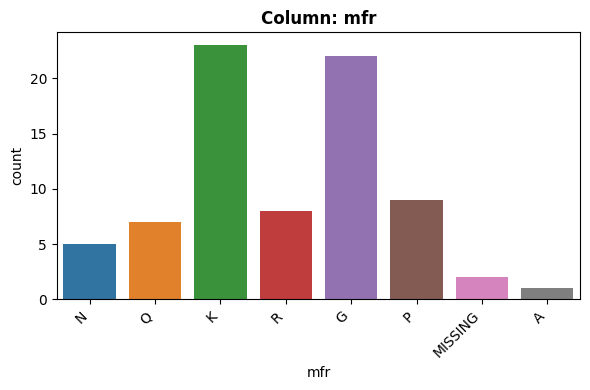

- NaN's Found: 2 (2.6%)
- Unique Values: 8
- Most common value: 'K' occurs 23 times (29.87%)
- Not constant or quasi-constant.


In [7]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 null values (2.6%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 8 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'mfr vs. rating'}, xlabel='mfr', ylabel='rating'>)

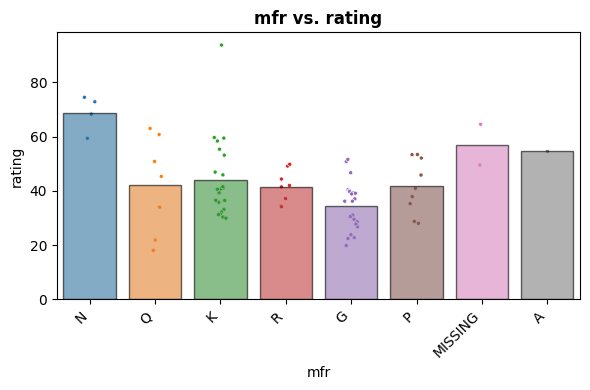

In [8]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'rating')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the groups, even though some have similar means.

___

### type

- type: hot or cold
  

In [9]:
# Confirming the dtype to select correct EDA function
feature = "type"
df[feature].dtype

dtype('O')

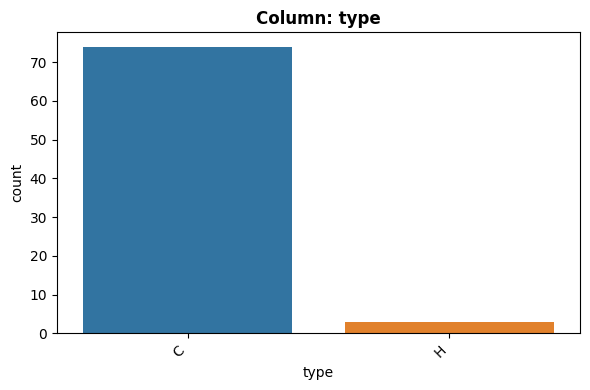

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'C' occurs 74 times (96.1%)
- Not constant or quasi-constant.


In [10]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



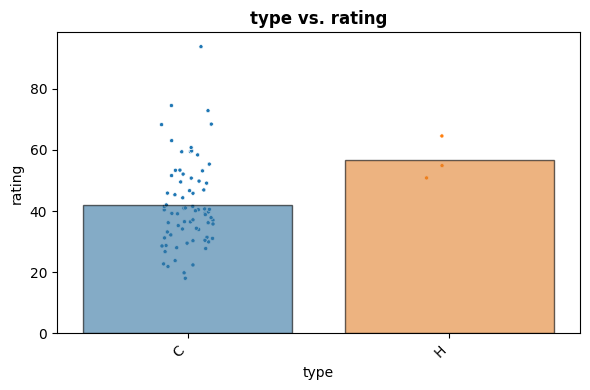

In [11]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be rated higher. 
  - Does this feature appear to be a predictor of the target?
    - Yes, hot cereals seem to get a higher rating.

___

### calories

- calories: calories per serving

In [12]:
# Confirming the dtype to select correct EDA function
feature = "calories"
df[feature].dtype

dtype('float64')

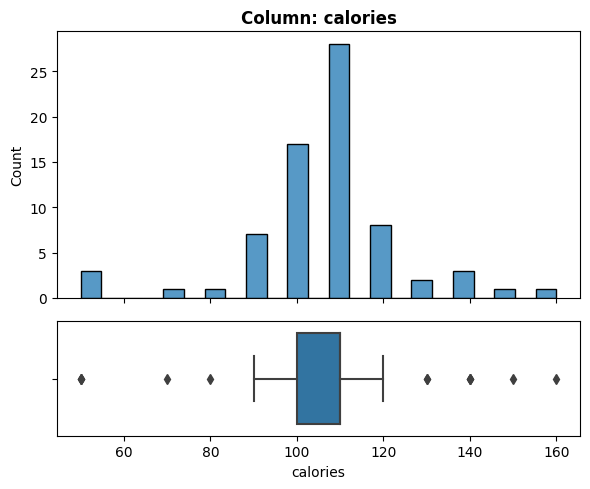

- NaN's Found: 5 (6.49%)
- Unique Values: 11
- Most common value: '110.0' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [13]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 5 (6.49%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



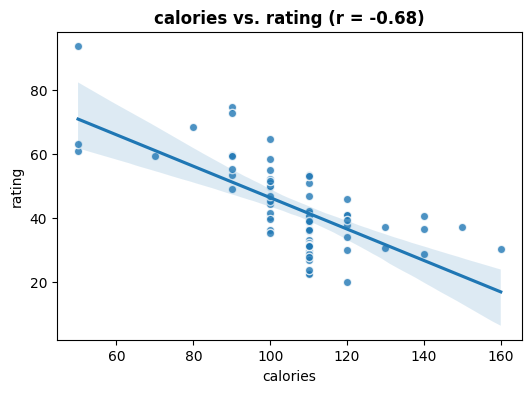

In [14]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer high calorie cereals.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than I expected!

___

### protein

- protein: grams of protein
  

In [15]:
# Confirming the dtype to select correct EDA function
feature = "protein"
df[feature].dtype

dtype('int64')

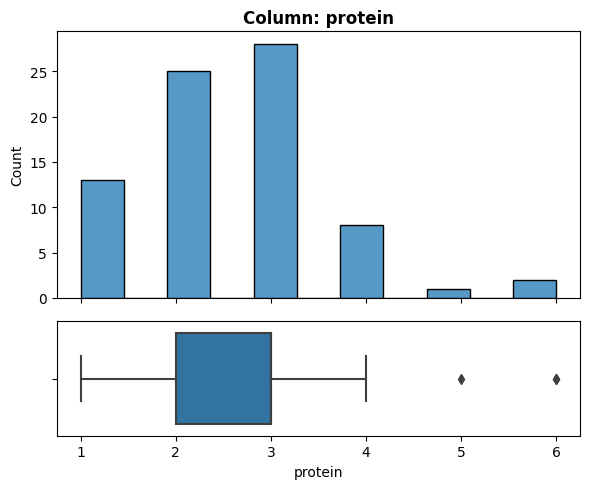

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '3' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [16]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 6 unique values. Not high (since its \<10).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



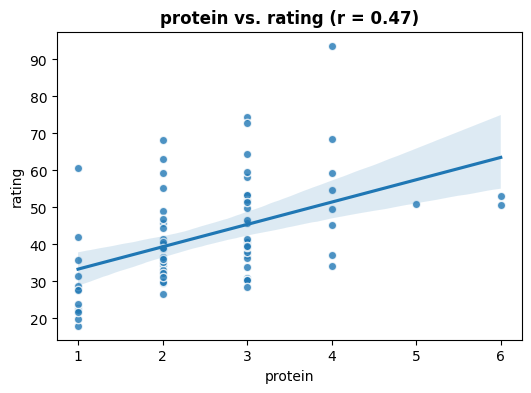

In [17]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would assume more protein would be better.
  - Does this feature appear to be a predictor of the target?
    - Yes!

___

### fat

- fat: grams of fat
  

In [18]:
# Confirming the dtype to select correct EDA function
feature = "fat"
df[feature].dtype

dtype('float64')

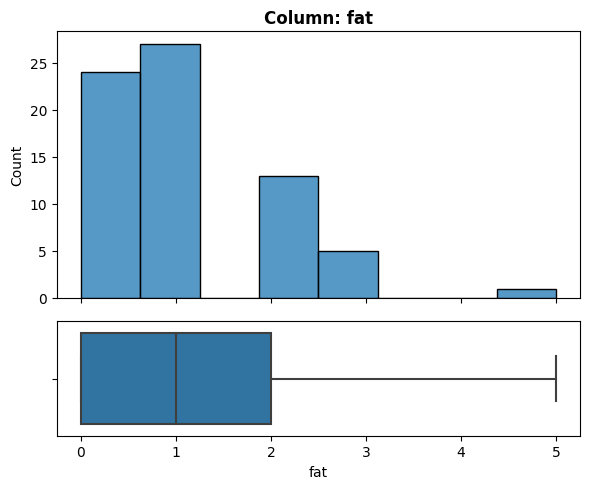

- NaN's Found: 7 (9.09%)
- Unique Values: 5
- Most common value: '1.0' occurs 27 times (35.06%)
- Not constant or quasi-constant.


In [19]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 7 (9%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



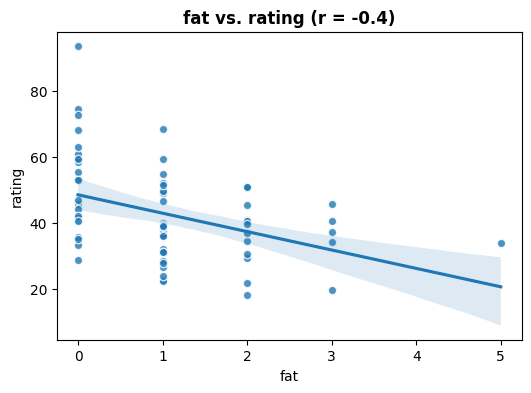

In [20]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I assume fatty cereals would be rated higher. 
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than expected.

___

### fiber

- fiber: grams of dietary fiber

  

In [21]:
# # Confirming the dtype to select correct EDA function
feature = "fiber"
df[feature].dtype

dtype('float64')

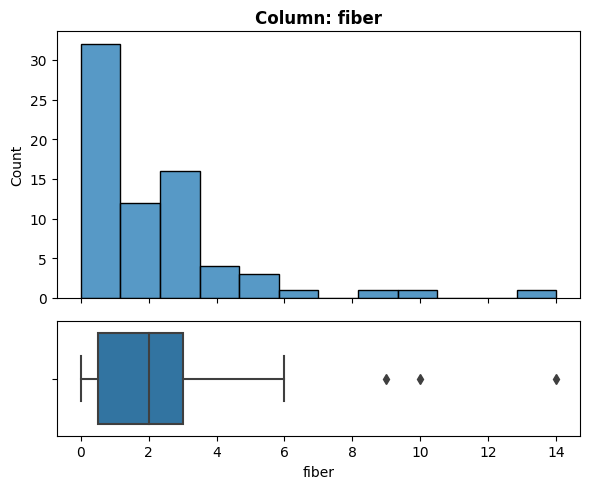

- NaN's Found: 6 (7.79%)
- Unique Values: 13
- Most common value: '0.0' occurs 18 times (23.38%)
- Not constant or quasi-constant.


In [22]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 (7.79%)
  - Impute with the median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



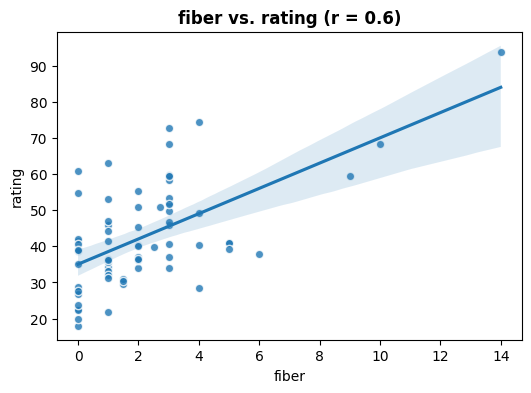

In [23]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes I would expect having more fiber corresponds with a higher rating.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

In [24]:
df.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars', 'shelf',
       'rating'],
      dtype='object')

### sugars

- sugars: grams of sugars

In [25]:
# Confirming the dtype to select correct EDA function
feature = "sugars"
df[feature].dtype

dtype('float64')

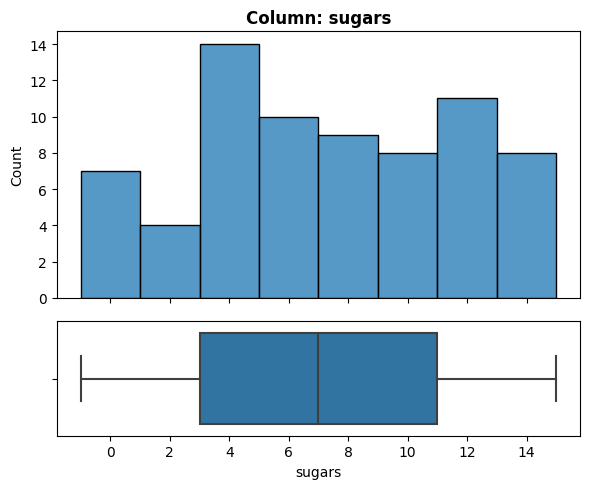

- NaN's Found: 6 (7.79%)
- Unique Values: 17
- Most common value: '3.0' occurs 13 times (16.88%)
- Not constant or quasi-constant.


In [26]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 (7.79%)
  - Impute with the median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



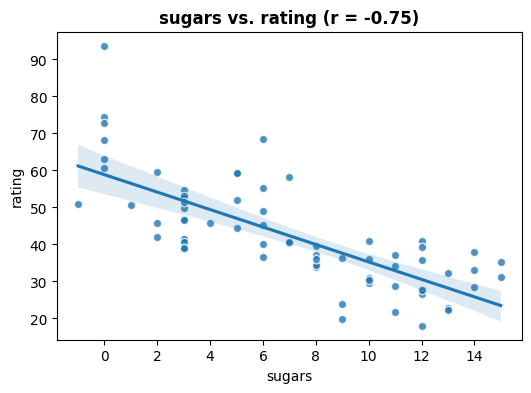

In [27]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people would rate sugary cereals higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected.

___

### shelf

- shelf: display shelf (1, 2, or 3, counting from the floor)

In [28]:
# Confirming the dtype to select correct EDA function
feature = "shelf"
df[feature].dtype

dtype('O')

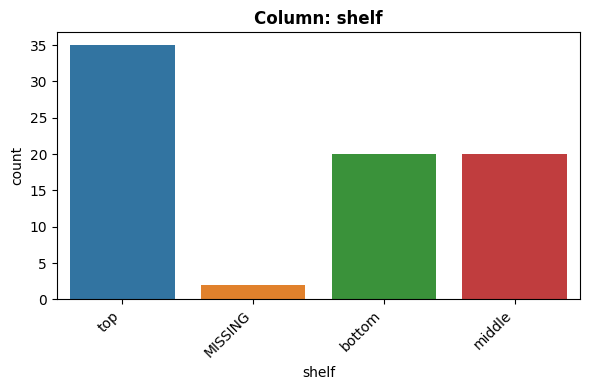

- NaN's Found: 2 (2.6%)
- Unique Values: 4
- Most common value: 'top' occurs 35 times (45.45%)
- Not constant or quasi-constant.


In [29]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal. Data Dictionary says it should be integers: 1,2,3 with 1 being closest to the floor)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 (2.6%)
  - Impute with a placeholder (0)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 (including null values). 

5. Would we know this BEFORE the target is determined?
  - Maybe? 

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



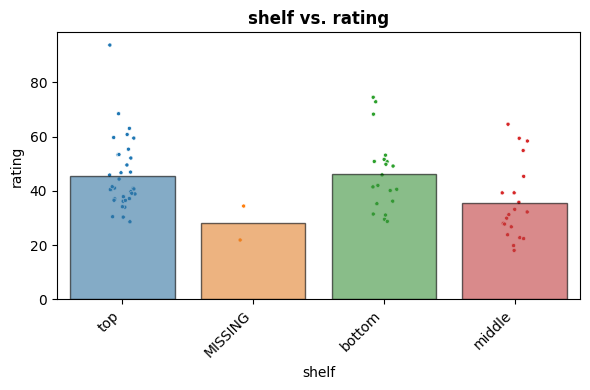

In [30]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I am not sure. 
  - Does this feature appear to be a predictor of the target?
    - Yes, it seems that being in the middle shelf is associated with a lower rating.

___

### rating (target)

- rating: a rating of the cereals (Possibly from Consumer Reports?)

  

In [31]:
# Confirming the dtype to select correct EDA function
feature = "rating"
df[feature].dtype

dtype('float64')

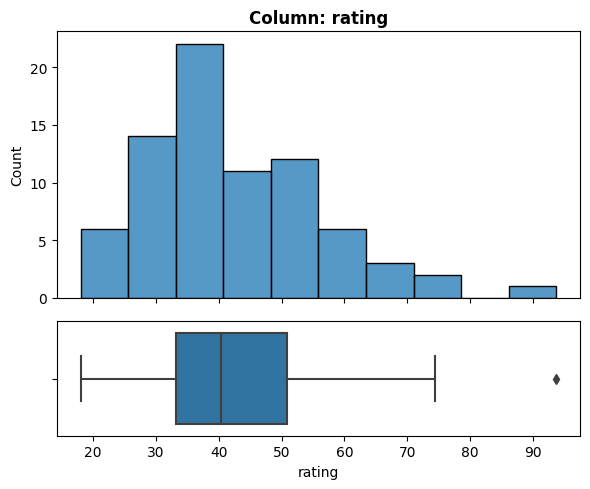

- NaN's Found: 0 (0.0%)
- Unique Values: 77
- Most common value: '68.402973' occurs 1 times (1.3%)
- Not constant or quasi-constant.


In [32]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature! 

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!




## SimpleImputer Exercise (Practice)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

### Define target and features and train-test-split:

In [34]:
# Define features (X) and target (y).
X = df.drop(columns='rating')
y = df['rating']

In [35]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,mfr,type,calories,protein,fat,fiber,sugars,shelf
30,P,C,100.0,2,0.0,0.0,15.0,bottom
40,G,C,110.0,2,1.0,0.0,3.0,middle
39,K,C,140.0,3,1.0,2.0,9.0,top
16,K,C,100.0,2,0.0,1.0,2.0,bottom
65,N,C,90.0,3,0.0,3.0,0.0,bottom


In [36]:
# Check # of null values in X_train
X_train.isna().sum()

mfr         2
type        0
calories    0
protein     0
fat         5
fiber       5
sugars      5
shelf       0
dtype: int64

In [37]:
# Check X_train dtypes
X_train.dtypes

mfr          object
type         object
calories    float64
protein       int64
fat         float64
fiber       float64
sugars      float64
shelf        object
dtype: object

### Define groups of features using lists:



In [38]:
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['calories', 'protein', 'fat', 'fiber', 'sugars'], dtype='object')

In [39]:
ordinal_cols = ['shelf']
ordinal_cols

['shelf']

In [40]:
categorical_cols = X_train.select_dtypes('object').drop(columns='shelf').columns
categorical_cols

Index(['mfr', 'type'], dtype='object')

### Impute the numeric columns

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
# Instantaite and fit the imputer for numeric features
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [43]:
# Transform the training and test numeric features and save as new vars
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

# confirm no null values remaining
X_train_num_imputed.isna().sum()

calories    0
protein     0
fat         0
fiber       0
sugars      0
dtype: int64

### Impute the categorical columns

In [44]:
# Instantaite and fit the imputer for categorical features
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [45]:
# Transform the training and test categorical features and save as new vars
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

# confirm no null values remaining
X_train_cat_imputed.isna().sum()

mfr     0
type    0
dtype: int64

### Impute the ordinal column

In [46]:
# Instantaite and fit the imputer for categorical features
impute_most_freq = SimpleImputer(strategy='most_frequent')
impute_most_freq.fit(X_train[ordinal_cols])

SimpleImputer(strategy='most_frequent')

In [47]:
# Transform the training and test categorical features and save as new vars
X_train_ord_imputed = impute_most_freq.transform(X_train[ordinal_cols])
X_test_ord_imputed = impute_most_freq.transform(X_test[ordinal_cols])

# confirm no null values remaining
X_train_ord_imputed.isna().sum()

shelf    0
dtype: int64

<a name='new'></a>
# ⭐️ Encoders Exercise Solution


## Import New Tools

In [48]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### Encode the Categorical Data with OneHotEncoder

In [52]:
# Instantiate and fit onehotencoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_cat_imputed)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [55]:
# Transform the categorical features and save
X_train_cat_encoded = encoder.transform(X_train_cat_imputed)
X_test_cat_encoded = encoder.transform(X_test_cat_imputed)
X_train_cat_encoded.head()

,mfr_A,mfr_G,mfr_K,mfr_MISSING,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
# compare the shapes
print("X_train_cat_imputed: ", X_train_cat_imputed.shape)
print("X_train_cat_encoded: ", X_train_cat_encoded.shape)

X_train_cat_imputed:  (57, 2)
X_train_cat_encoded:  (57, 10)


- X_train_cat_encoded has 8 more columns than the imputed version before encoding.

### Encode the Ordinal Data with OrdinalEncoder

In [59]:
# check unique categories in shelf
X_train_ord_imputed['shelf'].unique()

array(['bottom', 'middle', 'top'], dtype=object)

In [60]:
# create list with order of categories
shelf_order = ['bottom','middle','top']


In [61]:
# Instantiate and fit an ordinalencoder
ord_encoder = OrdinalEncoder(categories=[shelf_order])
ord_encoder.fit(X_train_ord_imputed)

OrdinalEncoder(categories=[['bottom', 'middle', 'top']])

In [62]:
# Transform the categorical features and save
X_train_ord_encoded = ord_encoder.transform(X_train_ord_imputed)
X_test_ord_encoded = ord_encoder.transform(X_test_ord_imputed)
X_train_ord_encoded.head()

,shelf
30,0.0
40,1.0
39,2.0
16,0.0
65,0.0


In [63]:
# compare the shapes
print("X_train_ord_imputed: ", X_train_ord_imputed.shape)
print("X_train_ord_encoded: ", X_train_ord_encoded.shape)

X_train_ord_imputed:  (57, 1)
X_train_ord_encoded:  (57, 1)


- X_train_ord_encoded has the same number of columns as it did before encoding.